In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [2]:
# Define the path to your CSV file
file_path = "/content/drive/MyDrive/Neural_Nets_Project/selected_asag_dataset.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,index,question,student_answer,grades_round,ref_answer
0,0,"Give a definition for the term ""artificial ne...",An artificial neural network is a massively pa...,2,A neural network is a massively parallel distr...
1,1,"Give a definition for the term ""artificial ne...",Artificial neural network consists of: . Large...,2,A neural network is a massively parallel distr...
2,2,"Give a definition for the term ""artificial ne...",An artificial neural network is a massive dist...,1,A neural network is a massively parallel distr...
3,3,"Give a definition for the term ""artificial ne...",An ANN is a layered graphical model containing...,2,A neural network is a massively parallel distr...
4,4,"Give a definition for the term ""artificial ne...",Artificial Neural Networks are large parallel ...,2,A neural network is a massively parallel distr...


In [3]:
!pip install sentence_transformers

In [4]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Initialize the SentenceTransformer model
model = SentenceTransformer('ggrn/e5-small-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.0k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [5]:
# Ensure that all entries in the student_answer and ref_answer columns are strings
df['student_answer'] = df['student_answer'].astype(str)
df['ref_answer'] = df['ref_answer'].astype(str)

In [6]:
# Encode the student and reference answers
# Note: Depending on the size of your dataset, this might take some time.
student_answer_embeddings = model.encode(df['student_answer'].tolist(), show_progress_bar=True)
ref_answer_embeddings = model.encode(df['ref_answer'].tolist(), show_progress_bar=True)

# The embeddings are numpy arrays with the shape (number_of_rows, embedding_size)
# You can check the shape to confirm
print(student_answer_embeddings.shape)
print(ref_answer_embeddings.shape)

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

(646, 384)
(646, 384)


In [7]:
# Optionally, you can add these embeddings to your DataFrame, though they are in a multidimensional array format.
# Here's an example of converting them to lists and adding them to the DataFrame:
df['student_answer_embeddings'] = student_answer_embeddings.tolist()
df['ref_answer_embeddings'] = ref_answer_embeddings.tolist()

# Save the DataFrame with embeddings to a new CSV file, if needed
#df.to_csv('/path/to/your/updated_dataset.csv', index=False)

In [8]:
import numpy as np

In [9]:
concatenated_embeddings = [np.concatenate((student_emb, ref_emb)) for student_emb, ref_emb in zip(student_answer_embeddings, ref_answer_embeddings)]


In [10]:
df['concatenated_embeddings'] = [emb.tolist() for emb in concatenated_embeddings]

In [11]:
# Convert the list of concatenated embeddings into a numpy array
concatenated_embeddings_array = np.array(concatenated_embeddings)

# Now, you can print the shape of this numpy array
print(concatenated_embeddings_array.shape)

(646, 768)


In [13]:
df.to_csv('/content/drive/MyDrive/Neural_Nets_Project/embedding_dataset.csv', index=False)

In [14]:
df.head()

,index,question,student_answer,grades_round,ref_answer,student_answer_embeddings,ref_answer_embeddings,concatenated_embeddings
0,0,"Give a definition for the term ""artificial ne...",An artificial neural network is a massively pa...,2,A neural network is a massively parallel distr...,"[-0.07753647118806839, 0.0108279874548316, -0....","[-0.0727984607219696, 0.01781071536242962, -0....","[-0.07753647118806839, 0.0108279874548316, -0...."
1,1,"Give a definition for the term ""artificial ne...",Artificial neural network consists of: . Large...,2,A neural network is a massively parallel distr...,"[-0.05055636540055275, -0.002324952045455575, ...","[-0.07279843837022781, 0.01781073585152626, -0...","[-0.05055636540055275, -0.002324952045455575, ..."
2,2,"Give a definition for the term ""artificial ne...",An artificial neural network is a massive dist...,1,A neural network is a massively parallel distr...,"[-0.05303863435983658, -0.0014705281937494874,...","[-0.07279843837022781, 0.01781073585152626, -0...","[-0.05303863435983658, -0.0014705281937494874,..."
3,3,"Give a definition for the term ""artificial ne...",An ANN is a layered graphical model containing...,2,A neural network is a massively parallel distr...,"[-0.10464396327733994, 0.024795126169919968, -...","[-0.07279843837022781, 0.01781073585152626, -0...","[-0.10464396327733994, 0.024795126169919968, -..."
4,4,"Give a definition for the term ""artificial ne...",Artificial Neural Networks are large parallel ...,2,A neural network is a massively parallel distr...,"[-0.07063396275043488, -0.011542345397174358, ...","[-0.07279843837022781, 0.01781073585152626, -0...","[-0.07063396275043488, -0.011542345397174358, ..."


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Neural_Nets_Project/embedding_dataset.csv")

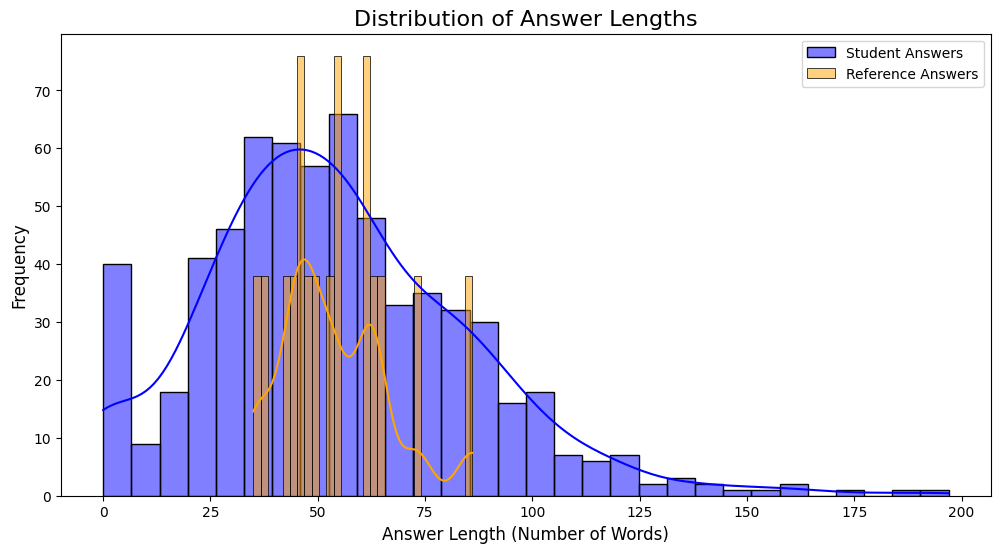

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all entries are strings and handle missing values
df['student_answer'] = df['student_answer'].fillna('').astype(str)
df['ref_answer'] = df['ref_answer'].fillna('').astype(str)

# Add a new column for word count in student and reference answers
df['student_answer_length'] = df['student_answer'].apply(lambda x: len(x.split()))
df['ref_answer_length'] = df['ref_answer'].apply(lambda x: len(x.split()))

# Display the first few rows to confirm
df.head()

# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(df['student_answer_length'], color='blue', label='Student Answers', kde=True, bins=30)
sns.histplot(df['ref_answer_length'], color='orange', label='Reference Answers', kde=True, bins=30)
plt.title('Distribution of Answer Lengths', fontsize=16)
plt.xlabel('Answer Length (Number of Words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

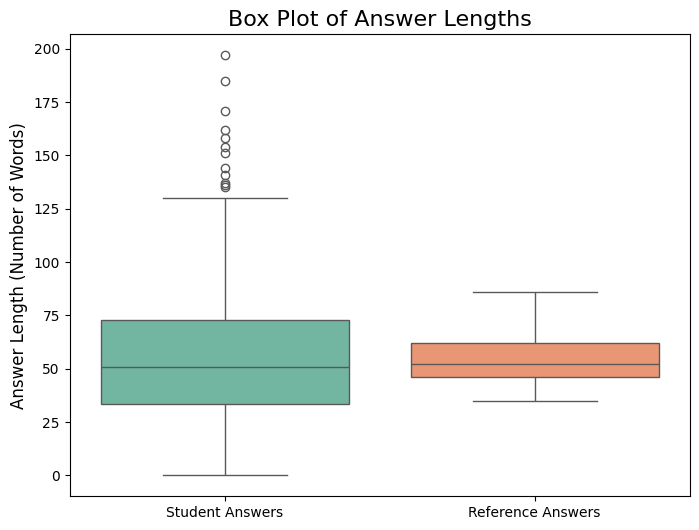

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[df['student_answer_length'], df['ref_answer_length']], palette="Set2")
plt.xticks([0, 1], ['Student Answers', 'Reference Answers'])
plt.title('Box Plot of Answer Lengths', fontsize=16)
plt.ylabel('Answer Length (Number of Words)', fontsize=12)
plt.show()